# kNN: k-nearest neighbor classifier 

Exmple of usage kNN library on the well-known Iris dataset.
Evaluation of the leave-one-out cross-validation for different setup of 'k' and 'p' parameters, 
where 'k' is the neigbors count and 'p' the Minkowski distance parameter.

Load libraries

In [1]:
using kNN
using MLDatasets, Random, DataFrames
using StatsBase
using Plots, Printf

Load dataset

In [2]:
dataset = DataFrame(shuffle(eachrow(Iris().dataframe)))

,sepallength,sepalwidth,petallength,petalwidth,class
,Float64,Float64,Float64,Float64,String15
1,7.0,3.2,4.7,1.4,Iris-versicolor
2,7.9,3.8,6.4,2.0,Iris-virginica
3,4.9,3.1,1.5,0.1,Iris-setosa
4,7.6,3.0,6.6,2.1,Iris-virginica
5,6.3,3.4,5.6,2.4,Iris-virginica
6,5.7,2.9,4.2,1.3,Iris-versicolor
7,7.2,3.6,6.1,2.5,Iris-virginica
8,6.3,2.5,4.9,1.5,Iris-versicolor
9,5.1,3.3,1.7,0.5,Iris-setosa


Normalise data features to zero mean and unit standard devitation

In [3]:
z(s, μ, σ, ϵ) = (s - μ) / (σ + ϵ)
for i=1:4
    tmp = dataset[:, i]
    dataset[:, i] = z.(tmp, mean(tmp), std(tmp), 10e-10)
end

Prepare heatmap matrix of 'k' and 'p' parameters

In [4]:
k_linspace = 1:20
p_linspace = 1:0.05:5
heatmap_matrix = zeros(length(k_linspace), length(p_linspace));

Fill heatmap matrix with accuracy results for different parameters setting

In [5]:
for (k::Int64, k_itr::Int64) in zip(k_linspace, 1:length(k_linspace))
    for (p::Float64, p_itr::Int64) in zip(p_linspace, 1:length(p_linspace))
        heatmap_matrix[k_itr, p_itr] = leave_one_out_kNN(dataset, 1:4, 5, k, p)
    end
end

Plot the heatmap

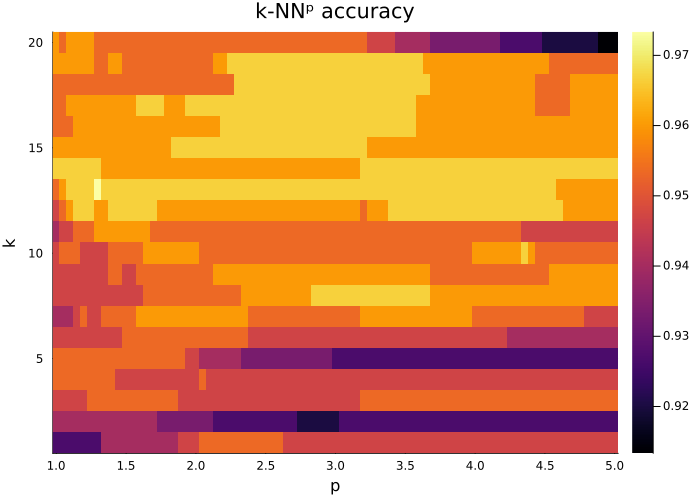

In [6]:
gr(size=(700, 500), html_output_format=:png)
heatmap(heatmap_matrix, xticks = (1:10:length(p_linspace)+1, 
    string.(1:maximum(p_linspace)/10:maximum(p_linspace))), title="k-NNᵖ accuracy", xlabel="p", ylabel="k")

Get the minimum and the maximum accuracy settings

In [8]:
max_arg = argmax(heatmap_matrix)
min_arg = argmin(heatmap_matrix)
@printf "best accuracy: %.3f for p = %.2f and k = %i\n" heatmap_matrix[max_arg] max_arg[2]*0.05+1 max_arg[1]
@printf "worst accuracy: %.3f for p = %.2f and k = %i\n" heatmap_matrix[min_arg] min_arg[2]*0.05+1 min_arg[1]

best accuracy: 0.973 for p = 1.35 and k = 13
worst accuracy: 0.913 for p = 4.95 and k = 20
